In [1]:
import math
import time

In [56]:
# Compute log base two of a given input
def Log2(x): 
    if x == 0: 
        return false 
    return (math.log10(x) / math.log10(2))

# Run the collatz algorithm on a given number
# Return the power of 2 that the chain terminates on
def Collatz(n):
    if math.ceil(Log2(n)) == math.floor(Log2(n)): # n is a power of 2
        return int(Log2(n))
    if n % 2 == 0: # even
        return Collatz(n/2)
    else: # odd
        return Collatz(3*n+1)

# return array of collatz algorithm run on points [xi,xf] in \ZZ
def generate_points(xi, xf):
    # Start time
    start_time = time.time()
    
    # Run Collatz algorithm on points
    points = [(n,Collatz(n)) for n in range(xi,xf+1)]
    dt = time.time() - start_time # total run time in secs
    
    # Print run time data
    hours = math.floor(dt/3600)
    minutes = math.floor((dt-(hours*3600))/60)
    secs = round(dt-(3600*hours)-(60*minutes), 3)
    print("Computed "+str(xf-xi+1)+" points in "+str(hours)+"hr "+str(minutes)+"min "+str(secs)+"sec")
    
    return points

# Write array of points to file
def write_to_file(points, append=False):
    start_time = time.time() # to keep track of run time
    num_points = len(points)
    
    if append == True:
        f = open("pow2collatz_data/complete_dataset.txt", "a") # open file
        for (n, pow2n) in points: # write data to full dataset
            f.write(str(n)+" "+str(pow2n)+"\n") 
        print("Appended "+str(num_points)+" points to complete dataset in "+str(round(time.time()-start_time, 3))+ "seconds")
        f.close() # close file
    else:
        f = open("pow2collatz_data/"+str(points[0][0])+"--"+str(points[num_points-1][0])+"_dataset.txt", "w+") # open file
        for (n, pow2n) in points: # write data to new dataset
            f.write(str(n)+" "+str(pow2n)+"\n") 
        print("Wrote "+str(num_points)+" points in dataset in "+str(round(time.time()-start_time, 3))+" seconds")
        f.close() #close file

In [100]:
# Check density of pow_of_2 in dataset 'points' 
def check_abundance(points, pow_of_2):
    num = 0 # keep track of the number of times pow_of_2 appears
    length = len(points)
    
    for (n, q) in points:
        if q == pow_of_2:
            num += 1
    
    print("There were "+str(num)+" occurances of "+str(pow_of_2)+" out of "+str(length)+" points tested--")
    print("accounting for "+str(round(100*num/length,3))+"% of these points")

# Print the collatz branch for a particular number
def print_collatz_branch(n, steps=-1):
    steps += 1
    # collatz algorithm
    if n == 1: # n is 1, algorithm terminates
        print(" 1"), # Print input
        print("\n"+str(steps)+" steps")
        return
    if n % 2 == 0: # even
        print(str(n)+" -->"), # Print input
        print_collatz_branch(n/2,steps=steps)
    else: # odd
        print(str(n)+" -->"), # Print input
        print_collatz_branch(3*n+1,steps=steps)

In [25]:
for x in range(2,109):
    print "2 ^",x,"- 1 :",factor(2^x-1)

2 ^ 2 - 1 : 3
2 ^ 3 - 1 : 7
2 ^ 4 - 1 : 3 * 5
2 ^ 5 - 1 : 31
2 ^ 6 - 1 : 3^2 * 7
2 ^ 7 - 1 : 127
2 ^ 8 - 1 : 3 * 5 * 17
2 ^ 9 - 1 : 7 * 73
2 ^ 10 - 1 : 3 * 11 * 31
2 ^ 11 - 1 : 23 * 89
2 ^ 12 - 1 : 3^2 * 5 * 7 * 13
2 ^ 13 - 1 : 8191
2 ^ 14 - 1 : 3 * 43 * 127
2 ^ 15 - 1 : 7 * 31 * 151
2 ^ 16 - 1 : 3 * 5 * 17 * 257
2 ^ 17 - 1 : 131071
2 ^ 18 - 1 : 3^3 * 7 * 19 * 73
2 ^ 19 - 1 : 524287
2 ^ 20 - 1 : 3 * 5^2 * 11 * 31 * 41
2 ^ 21 - 1 : 7^2 * 127 * 337
2 ^ 22 - 1 : 3 * 23 * 89 * 683
2 ^ 23 - 1 : 47 * 178481
2 ^ 24 - 1 : 3^2 * 5 * 7 * 13 * 17 * 241
2 ^ 25 - 1 : 31 * 601 * 1801
2 ^ 26 - 1 : 3 * 2731 * 8191
2 ^ 27 - 1 : 7 * 73 * 262657
2 ^ 28 - 1 : 3 * 5 * 29 * 43 * 113 * 127
2 ^ 29 - 1 : 233 * 1103 * 2089
2 ^ 30 - 1 : 3^2 * 7 * 11 * 31 * 151 * 331
2 ^ 31 - 1 : 2147483647
2 ^ 32 - 1 : 3 * 5 * 17 * 257 * 65537
2 ^ 33 - 1 : 7 * 23 * 89 * 599479
2 ^ 34 - 1 : 3 * 43691 * 131071
2 ^ 35 - 1 : 31 * 71 * 127 * 122921
2 ^ 36 - 1 : 3^3 * 5 * 7 * 13 * 19 * 37 * 73 * 109
2 ^ 37 - 1 : 223 * 616318177
2 ^ 38

In [63]:
mil_range = generate_points(1,10**6)
write_to_file(mil_range, append=True)

Computed 1000000 points in 0.0hr 6.0min 26.371sec
Appended 1000000 points to complete dataset in 0.622seconds


In [64]:
one_to_two_mil_range = generate_points(10**6+1,2*10**6)
write_to_file(one_to_two_mil_range, append=True)

Computed 1000000 points in 0.0hr 7.0min 0.341sec
Appended 1000000 points to complete dataset in 0.532seconds


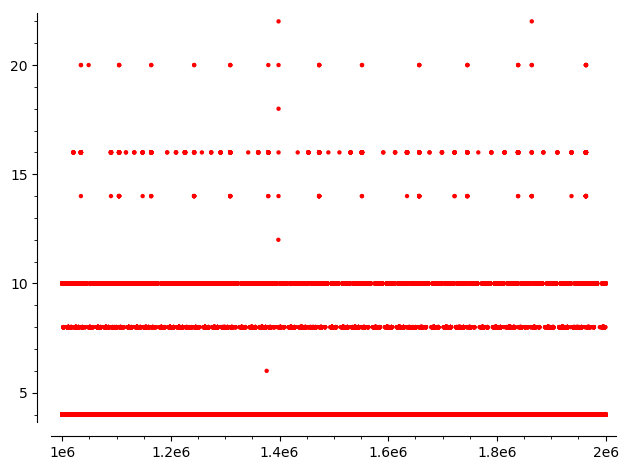

In [65]:
list_plot(mil_range,color='red', pointsize=10)
list_plot(one_to_two_mil_range,color='red', pointsize=10)

In [75]:
check_abundance(mil_range,4)
check_abundance(one_to_two_mil_range,4)
check_abundance(two_to_three_mil_range,4)
check_abundance(three_to_ten_mil_range,4)

There were 937712 occurances of 4 out of 1000000 points tested--
accounting for 93.771% of these points
There were 938003 occurances of 4 out of 1000000 points tested--
accounting for 93.8% of these points
There were 937957 occurances of 4 out of 1000000 points tested--
accounting for 93.796% of these points
There were 6565406 occurances of 4 out of 7000000 points tested--
accounting for 93.792% of these points


In [72]:
two_to_three_mil_range = generate_points(2*10**6+1,3*10**6)
write_to_file(two_to_three_mil_range, append=True)

Computed 1000000 points in 0.0hr 6.0min 57.841sec
Appended 1000000 points to complete dataset in 0.519seconds


In [74]:
three_to_ten_mil_range = generate_points(3*10**6+1,10**7)
write_to_file(three_to_ten_mil_range, append=True)

Computed 7000000 points in 0.0hr 54.0min 46.823sec
Appended 7000000 points to complete dataset in 3.711seconds


In [76]:
ten_to_15_mil_range = generate_points(10**7+1, 15*10**6)
write_to_file(ten_to_15_mil_range, append=True)

Computed 5000000 points in 0.0hr 38.0min 46.054sec
Appended 5000000 points to complete dataset in 2.522seconds


In [77]:
check_abundance(mil_range,10)
check_abundance(one_to_two_mil_range,10)
check_abundance(two_to_three_mil_range,10)
check_abundance(three_to_ten_mil_range,10)

There were 37912 occurances of 10 out of 1000000 points tested--
accounting for 3.791% of these points
There were 37686 occurances of 10 out of 1000000 points tested--
accounting for 3.769% of these points
There were 37714 occurances of 10 out of 1000000 points tested--
accounting for 3.771% of these points
There were 263991 occurances of 10 out of 7000000 points tested--
accounting for 3.771% of these points


In [78]:
check_abundance(mil_range,8)
check_abundance(one_to_two_mil_range,8)
check_abundance(two_to_three_mil_range,8)
check_abundance(three_to_ten_mil_range,8)

There were 23738 occurances of 8 out of 1000000 points tested--
accounting for 2.374% of these points
There were 23743 occurances of 8 out of 1000000 points tested--
accounting for 2.374% of these points
There were 23757 occurances of 8 out of 1000000 points tested--
accounting for 2.376% of these points
There were 166405 occurances of 8 out of 7000000 points tested--
accounting for 2.377% of these points


In [113]:
for n in range(1, 12):
    print_collatz_branch(12**n)

12 --> 6 --> 3 --> 10 --> 5 --> 16 --> 8 --> 4 --> 2 -->  --> 1 
9 steps
144 --> 72 --> 36 --> 18 --> 9 --> 28 --> 14 --> 7 --> 22 --> 11 --> 34 --> 17 --> 52 --> 26 --> 13 --> 40 --> 20 --> 10 --> 5 --> 16 --> 8 --> 4 --> 2 -->  --> 1 
23 steps
1728 --> 864 --> 432 --> 216 --> 108 --> 54 --> 27 --> 82 --> 41 --> 124 --> 62 --> 31 --> 94 --> 47 --> 142 --> 71 --> 214 --> 107 --> 322 --> 161 --> 484 --> 242 --> 121 --> 364 --> 182 --> 91 --> 274 --> 137 --> 412 --> 206 --> 103 --> 310 --> 155 --> 466 --> 233 --> 700 --> 350 --> 175 --> 526 --> 263 --> 790 --> 395 --> 1186 --> 593 --> 1780 --> 890 --> 445 --> 1336 --> 668 --> 334 --> 167 --> 502 --> 251 --> 754 --> 377 --> 1132 --> 566 --> 283 --> 850 --> 425 --> 1276 --> 638 --> 319 --> 958 --> 479 --> 1438 --> 719 --> 2158 --> 1079 --> 3238 --> 1619 --> 4858 --> 2429 --> 7288 --> 3644 --> 1822 --> 911 --> 2734 --> 1367 --> 4102 --> 2051 --> 6154 --> 3077 --> 9232 --> 4616 --> 2308 --> 1154 --> 577 --> 1732 --> 866 --> 433 --> 1300 --> 